STG: Study Time Goals (Degree of study time allocated by the student for the course)

SCG: Study Content Goals (Degree of study related to the course content)

STR: Study Time Related (Degree of study time related to the goals)

LPR: Lab Performance Related (Degree of lab performance related to the goals)

PEG: Performance Exam Goals (Degree of performance in exams related to the goals)

UNS: User Knowledge Level (or University Network Skill/Status - this one can vary, but in the context of the others, it often refers to the student's perceived knowledge or skill level, categorized as 'very_low', 'Low', 'Middle', 'High')

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage
df=pd.read_csv('data_student.csv')
df

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,High
254,0.78,0.61,0.71,0.19,0.60,Middle
255,0.54,0.82,0.71,0.29,0.77,High
256,0.50,0.75,0.81,0.61,0.26,Middle


In [21]:
df.shape

(258, 6)

In [22]:
df.columns

Index(['STG', 'SCG', 'STR', 'LPR', 'PEG', ' UNS'], dtype='object')

In [23]:
df.isnull().sum()

STG     0
SCG     0
STR     0
LPR     0
PEG     0
 UNS    0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     258 non-null    float64
 1   SCG     258 non-null    float64
 2   STR     258 non-null    float64
 3   LPR     258 non-null    float64
 4   PEG     258 non-null    float64
 5    UNS    258 non-null    object 
dtypes: float64(5), object(1)
memory usage: 12.2+ KB


In [25]:
df.describe()

,STG,SCG,STR,LPR,PEG
count,258.000000,258.000000,258.000000,258.000000,258.000000
mean,0.371147,0.355674,0.468004,0.432713,0.458539
std,0.210271,0.211962,0.245940,0.248108,0.255211
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240750,0.210000,0.291250,0.250000,0.250000
50%,0.327000,0.302500,0.490000,0.330000,0.500000
75%,0.495000,0.497500,0.690000,0.647500,0.660000
max,0.990000,0.900000,0.950000,0.990000,0.930000


In [26]:
num_cols = df.select_dtypes(include=np.number)
num_cols.skew()

STG    0.551702
SCG    0.609407
STR   -0.053910
LPR    0.400816
PEG    0.073660
dtype: float64

In [27]:
num_df = df.select_dtypes(include=['float64', 'int64'])

print("before skew:")
print(num_df.skew())


before skew:
STG    0.551702
SCG    0.609407
STR   -0.053910
LPR    0.400816
PEG    0.073660
dtype: float64


In [28]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')

num_df_transformed = pd.DataFrame(
    pt.fit_transform(num_df),
    columns=num_df.columns
)

print("after fix skew:")
print(num_df_transformed.skew())

after fix skew:
STG    0.022524
SCG    0.032857
STR   -0.060199
LPR    0.035859
PEG   -0.034155
dtype: float64


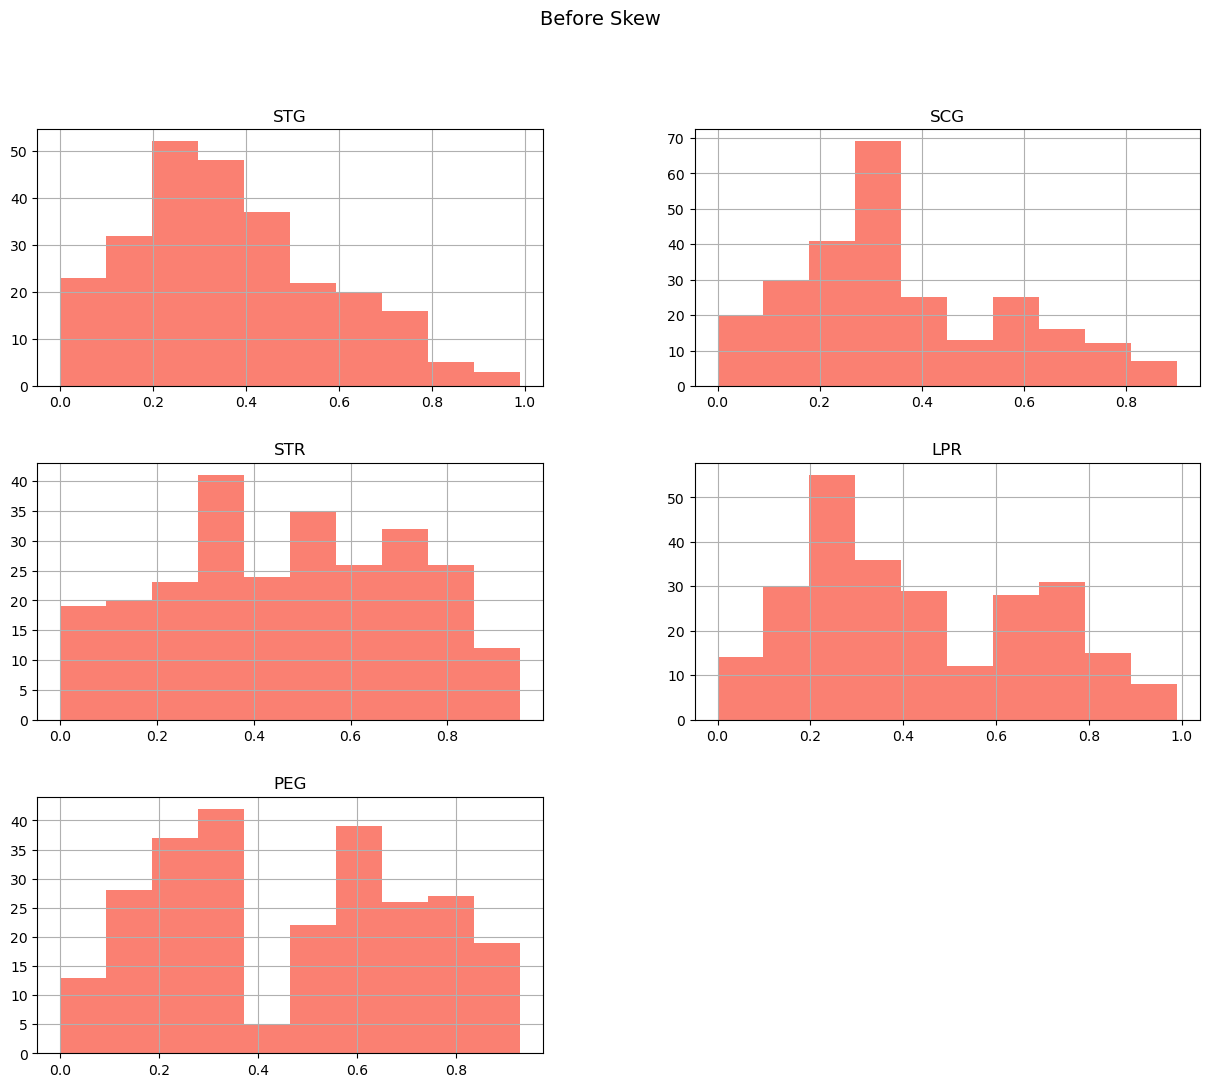

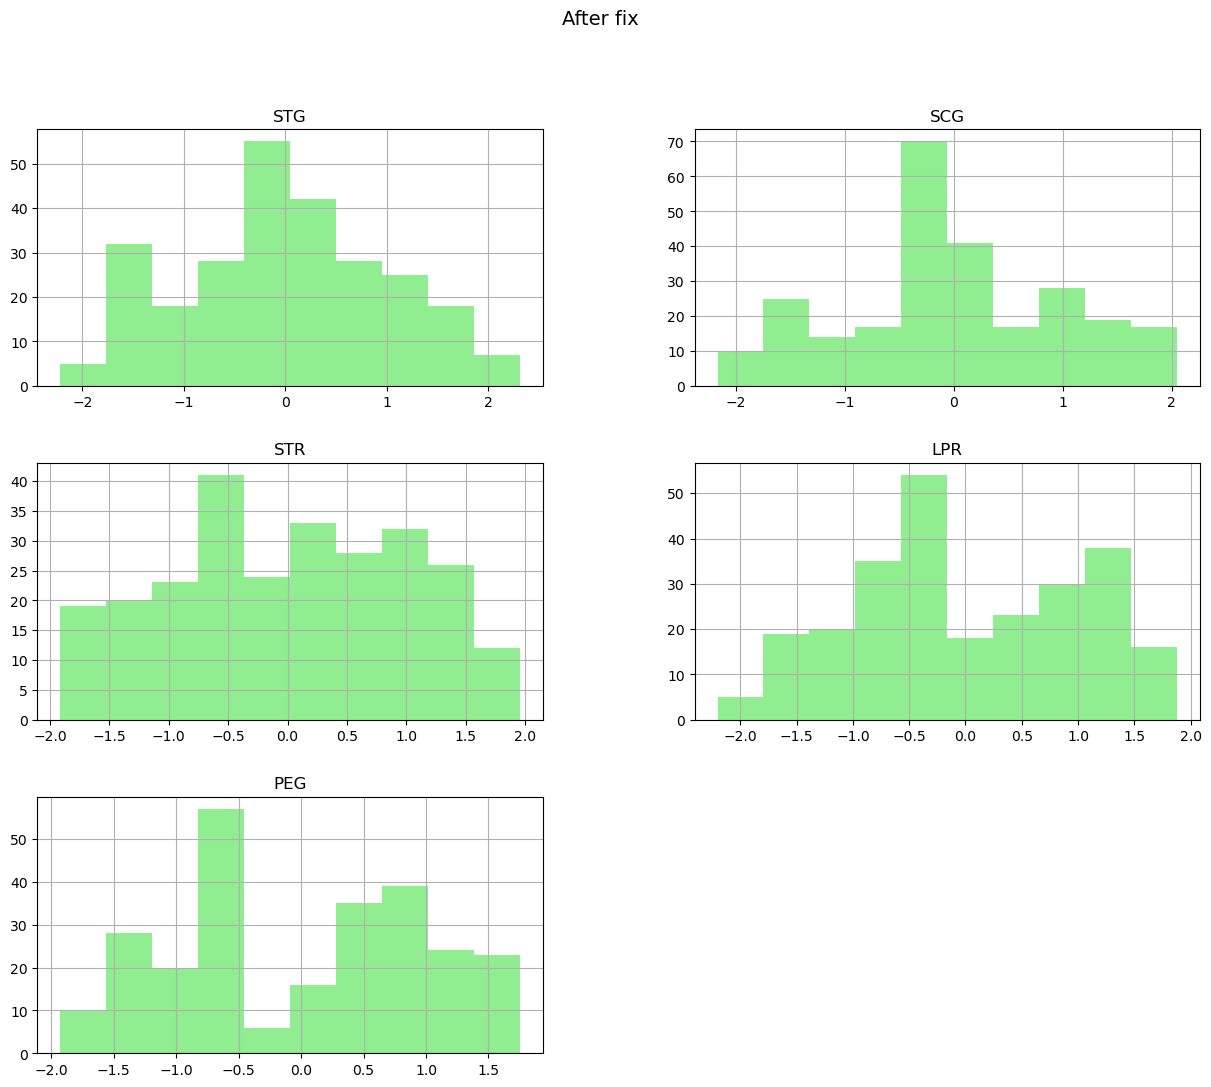

In [29]:
import matplotlib.pyplot as plt

num_df.hist(figsize=(15, 12), bins=10, color='salmon')
plt.suptitle("Before Skew", fontsize=14)
plt.show()

num_df_transformed.hist(figsize=(15, 12), bins=10, color='lightgreen')
plt.suptitle("After fix", fontsize=14)
plt.show()

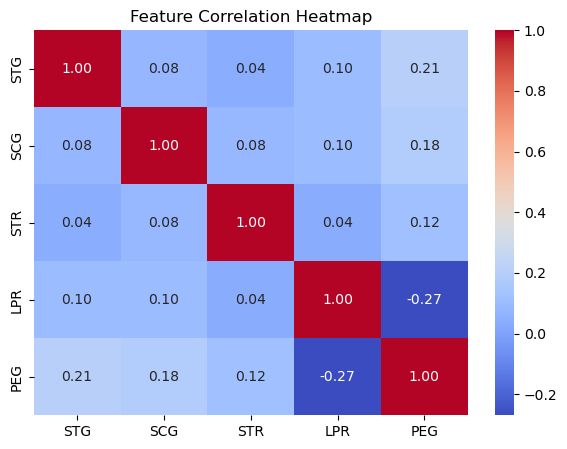

In [30]:
corr_matrix=num_cols.corr()
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [31]:
num_cols = df.select_dtypes(include='number').columns

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

outliers_mask = (df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))

print("Outlier count BEFORE removal:")
print(outliers_mask.sum())

df_no_outliers = df[~outliers_mask.any(axis=1)]

outliers_mask_after = (df_no_outliers[num_cols] < (Q1 - 1.5 * IQR)) | (df_no_outliers[num_cols] > (Q3 + 1.5 * IQR))

print("Outlier count AFTER removal:")
print(outliers_mask_after.sum())

print("Original dataset shape:", df.shape)
print("Dataset shape after removing outliers:", df_no_outliers.shape)
print("Total rows removed:", df.shape[0] - df_no_outliers.shape[0])

Outlier count BEFORE removal:
STG    5
SCG    0
STR    0
LPR    0
PEG    0
dtype: int64
Outlier count AFTER removal:
STG    0
SCG    0
STR    0
LPR    0
PEG    0
dtype: int64
Original dataset shape: (258, 6)
Dataset shape after removing outliers: (253, 6)
Total rows removed: 5


In [32]:
df.columns = [col.strip() for col in df.columns]  
X = df.drop('UNS', axis=1).values  

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
df

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,High
254,0.78,0.61,0.71,0.19,0.60,Middle
255,0.54,0.82,0.71,0.29,0.77,High
256,0.50,0.75,0.81,0.61,0.26,Middle


c:\Users\ruthr\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ruthr\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ruthr\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ruthr\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMe

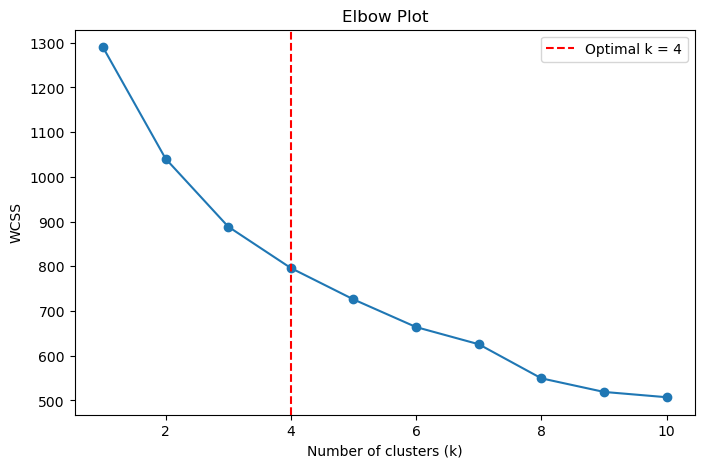

Best number of clusters (k): 4


In [35]:
from kneed import KneeLocator

wcss = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

kneedle = KneeLocator(K, wcss, curve='convex', direction='decreasing')
best_k = kneedle.elbow 

plt.figure(figsize=(8,5))
plt.plot(K, wcss, marker='o')
if best_k:  
    plt.axvline(best_k, color='r', linestyle='--', label=f'Optimal k = {best_k}')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Plot')
plt.legend()
plt.show()

print(f"Best number of clusters (k): {best_k}")


In [36]:
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_scaled)

score = silhouette_score(X_scaled, labels)
print("Silhouette Score for KMeans (k=4):", score)

Silhouette Score for KMeans (k=4): 0.1724086948007533


c:\Users\ruthr\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


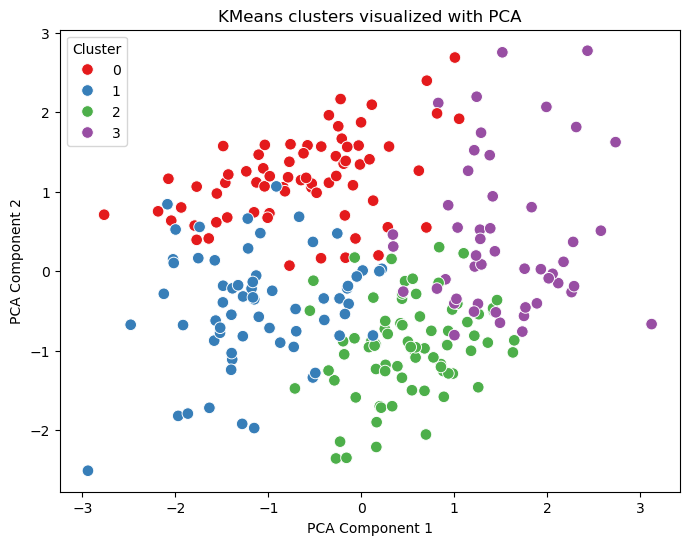

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='Set1', s=70)
plt.title('KMeans clusters visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='best')
plt.show()


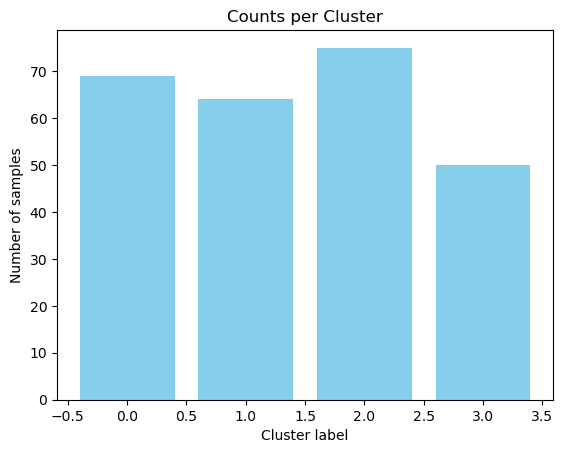

In [38]:
unique_labels, counts = np.unique(labels, return_counts=True)
plt.bar(unique_labels, counts, color='skyblue')
plt.title('Counts per Cluster')
plt.xlabel('Cluster label')
plt.ylabel('Number of samples')
plt.show()

In [39]:
scores = []
best_score = -1
best_k = None
for k in range(2, 11):
    hier = AgglomerativeClustering(n_clusters=k)
    labels = hier.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    if score > best_score:
        best_score = score
        best_k = k

print(f'Best k for Hierarchical Clustering (by silhouette): {best_k}')
print(f'Silhouette Score: {best_score}')

Best k for Hierarchical Clustering (by silhouette): 5
Silhouette Score: 0.17092747342836576


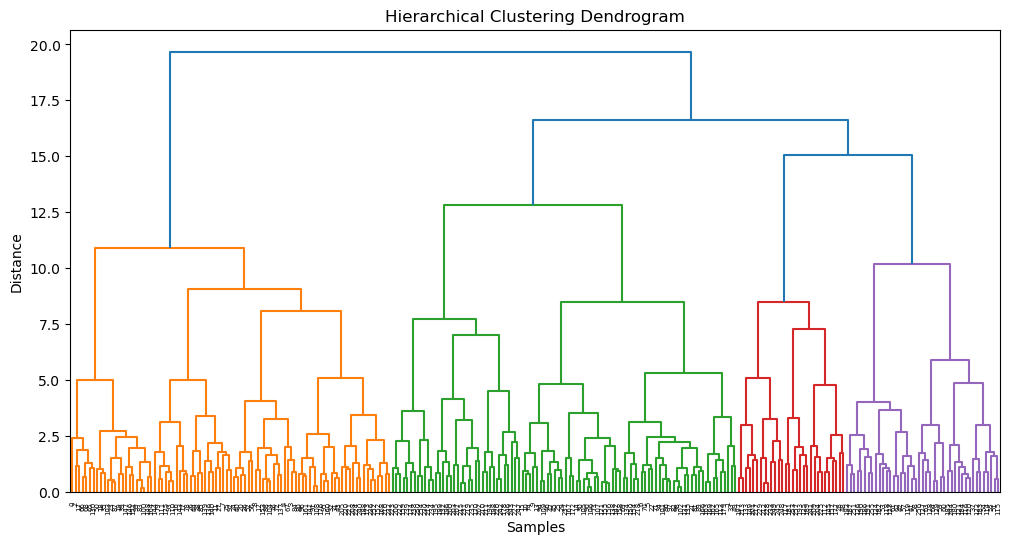

In [40]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X_scaled, method='ward') 
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

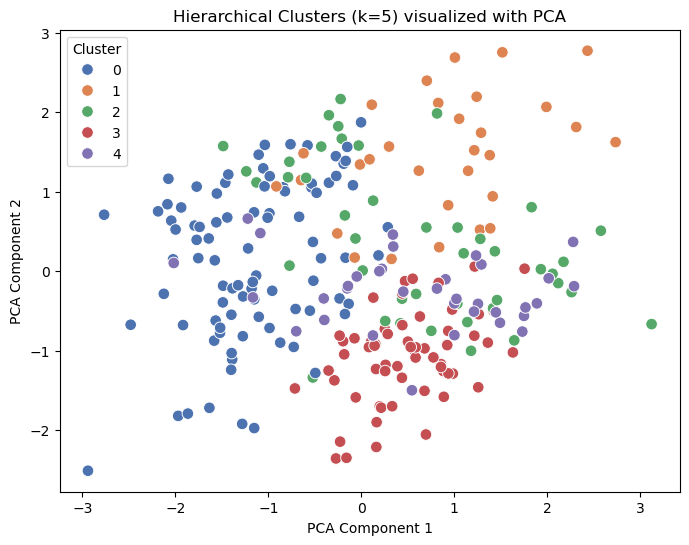

In [41]:
hier = AgglomerativeClustering(n_clusters=5)
labels = hier.fit_predict(X_scaled)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='deep', s=70)
plt.title('Hierarchical Clusters (k=5) visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='best')
plt.show()

In [42]:
best_score = -1
best_eps = None
best_min_samples = None
best_labels = None

for eps in np.arange(0.6, 1.2, 0.05):
    for min_samples in [3, 4, 5, 7]:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X_scaled)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            score = silhouette_score(X_scaled[labels != -1], labels[labels != -1])
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples
                best_labels = labels
print(f'\nBest DBSCAN: eps={best_eps:.4f}, min_samples={best_min_samples}, silhouette score={best_score:.4f}')


Best DBSCAN: eps=0.7000, min_samples=5, silhouette score=0.6424


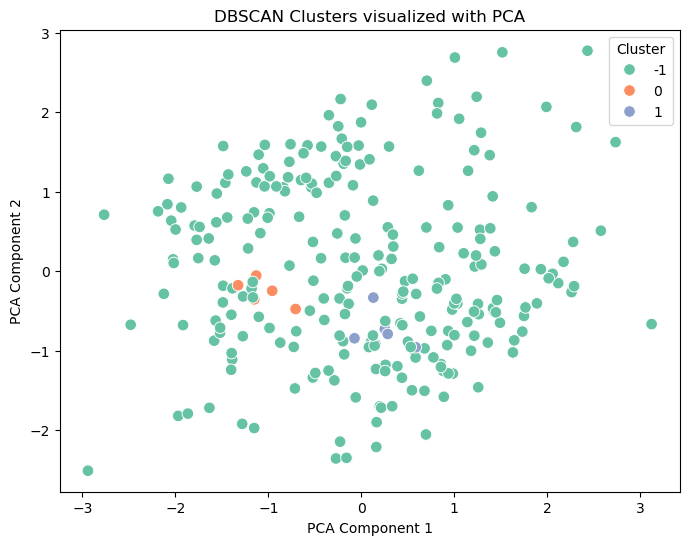

In [43]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=best_labels, palette='Set2', s=70)
plt.title(f'DBSCAN Clusters visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='best')
plt.show()